<a href="https://colab.research.google.com/github/Tobon74/Challenge-Telecome-X-/blob/main/challenge_telecom_carlos_villa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PASO 1: Cargar y explorar los datos**

In [34]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [35]:
# Configuración general
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [36]:
# 2. Cargar archivo JSON (subido a Colab)
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

In [37]:
# Convertir a DataFrame
df = pd.json_normalize(data)

In [38]:
# 3. Primer vistazo a los datos
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**PASO 2: Explorar tipos y estructura**

In [39]:
# Ver columnas y tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [40]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [41]:
# Estadísticas básicas
df.describe(include='all')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


In [42]:
# Revisar valores únicos por columna
print("\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} únicos")


Valores únicos por columna:
customerID: 7267 únicos
Churn: 3 únicos
customer.gender: 2 únicos
customer.SeniorCitizen: 2 únicos
customer.Partner: 2 únicos
customer.Dependents: 2 únicos
customer.tenure: 73 únicos
phone.PhoneService: 2 únicos
phone.MultipleLines: 3 únicos
internet.InternetService: 3 únicos
internet.OnlineSecurity: 3 únicos
internet.OnlineBackup: 3 únicos
internet.DeviceProtection: 3 únicos
internet.TechSupport: 3 únicos
internet.StreamingTV: 3 únicos
internet.StreamingMovies: 3 únicos
account.Contract: 3 únicos
account.PaperlessBilling: 2 únicos
account.PaymentMethod: 4 únicos
account.Charges.Monthly: 1585 únicos
account.Charges.Total: 6531 únicos


 **PASO 3: Limpieza y transformación**

 1. Revisar valores nulos y vacíos en Churn

In [43]:
# Verificar valores únicos en 'Churn'
print("Valores únicos en Churn:", df['Churn'].unique())

# Reemplazar valores vacíos o nulos en 'Churn' con NaN y eliminar filas si es necesario
df['Churn'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['Churn'])  # Eliminamos registros sin valor en Churn
df['Churn'] = df['Churn'].astype(str)


Valores únicos en Churn: ['No' 'Yes' '']


<ipython-input-43-f03e99af8fc0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace('', np.nan, inplace=True)
<ipython-input-43-f03e99af8fc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].astype(str)


 **Conversión de columnas anidadas (Charges.Total) a numérico**

In [44]:
# Convertir 'account.Charges.Total' a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificar y tratar posibles nulos en Charges.Total
df['account.Charges.Total'].fillna(0, inplace=True)


<ipython-input-44-8de6b4cc4a6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
<ipython-input-44-8de6b4cc4a6b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(0

** Revisar y aplanar columnas anidadas (opcional)**

Renombramos columnas para que sean más claras:

In [45]:
# Renombrar columnas para más claridad
df.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
}, inplace=True)


<ipython-input-45-104e55dc5514>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [46]:
# Crear la columna Cuentas_Diarias
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30


<ipython-input-46-e27fb4e0be43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30


In [47]:
df[['MonthlyCharges', 'Cuentas_Diarias']].head()


,MonthlyCharges,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


**Visualización: Cuentas_Diarias vs Churn**
Boxplot para ver la distribución

<ipython-input-48-442b95c0b023>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df, palette='coolwarm')


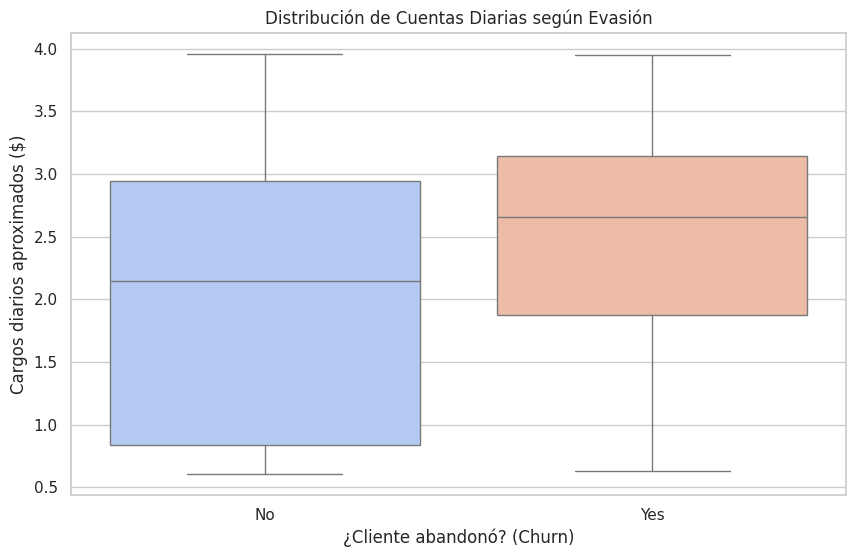

In [48]:
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df, palette='coolwarm')
plt.title("Distribución de Cuentas Diarias según Evasión")
plt.ylabel("Cargos diarios aproximados ($)")
plt.xlabel("¿Cliente abandonó? (Churn)")
plt.show()


**Histograma apilado**

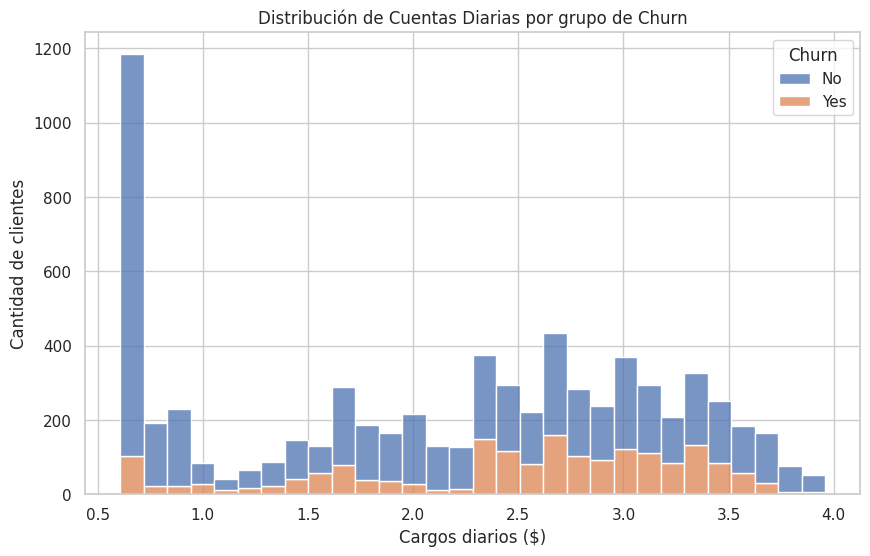

In [49]:
sns.histplot(data=df, x='Cuentas_Diarias', hue='Churn', multiple='stack', bins=30)
plt.title("Distribución de Cuentas Diarias por grupo de Churn")
plt.xlabel("Cargos diarios ($)")
plt.ylabel("Cantidad de clientes")
plt.show()


**Verificamos después de limpiar**

In [50]:
print("Dimensiones tras limpieza:", df.shape)
df.info()


Dimensiones tras limpieza: (7043, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract 

**PASO 4: Análisis Exploratorio de Datos (EDA)**

Vamos a responder visualmente:

¿Qué variables se asocian más con la evasión?

¿Qué patrones muestran los clientes que se fueron?

¿Qué servicios son más comunes entre quienes permanecen?

<ipython-input-51-a4be56f68b3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


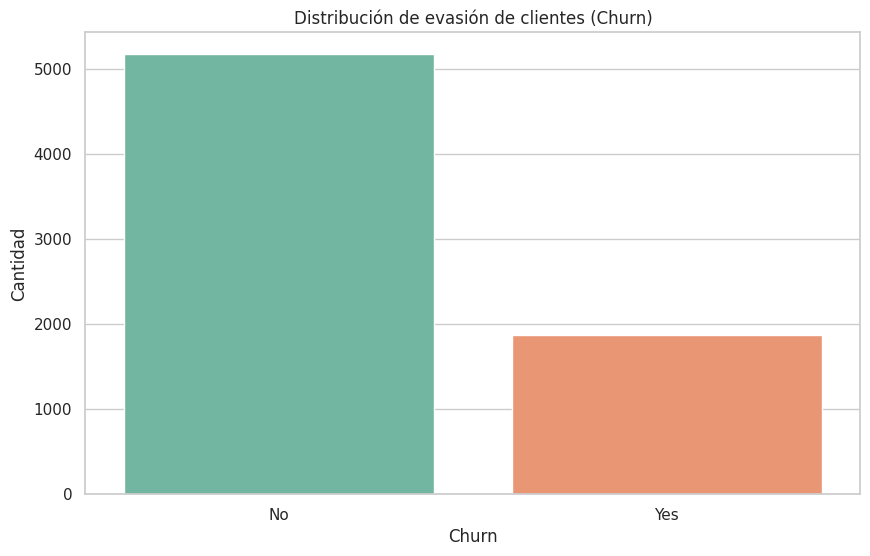

Porcentaje de clientes que se fueron y que se quedaron:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [51]:
# Distribución de Churn
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Distribución de evasión de clientes (Churn)")
plt.xlabel("Churn")
plt.ylabel("Cantidad")
plt.show()

# Porcentaje
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Porcentaje de clientes que se fueron y que se quedaron:\n", churn_rate)


**2. ¿Cómo influye el tipo de contrato en la evasión?**

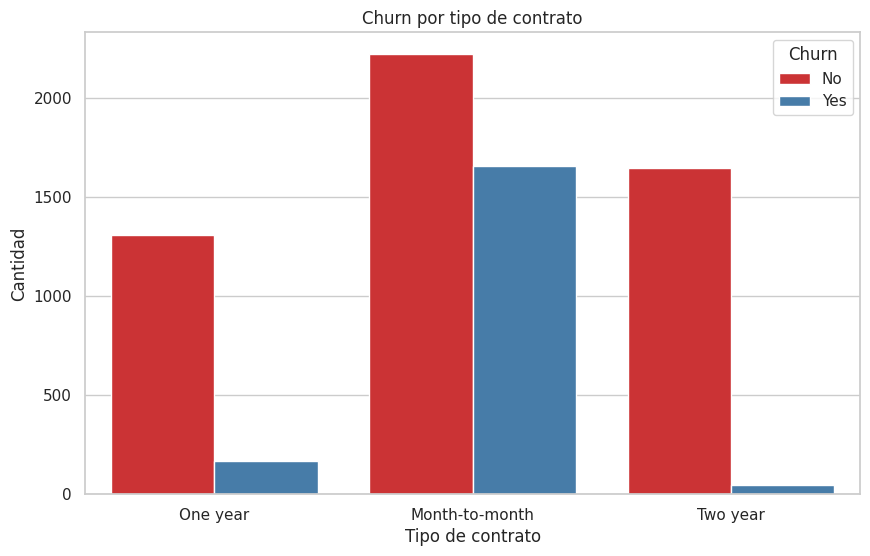

In [52]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title("Churn por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad")
plt.show()


Nota . Suele ser clave: clientes con contrato mensual abandonan más.

**3. ¿El tiempo como cliente (tenure) influye?**

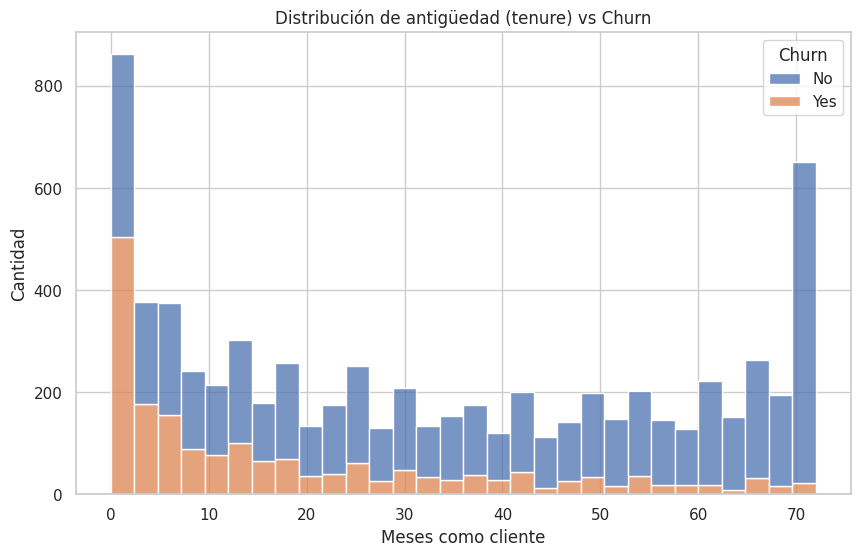

In [53]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Distribución de antigüedad (tenure) vs Churn")
plt.xlabel("Meses como cliente")
plt.ylabel("Cantidad")
plt.show()


Los que se van suelen tener poca antigüedad.

**4. ¿Influyen los cargos mensuales?**

<ipython-input-54-a97fc368465c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


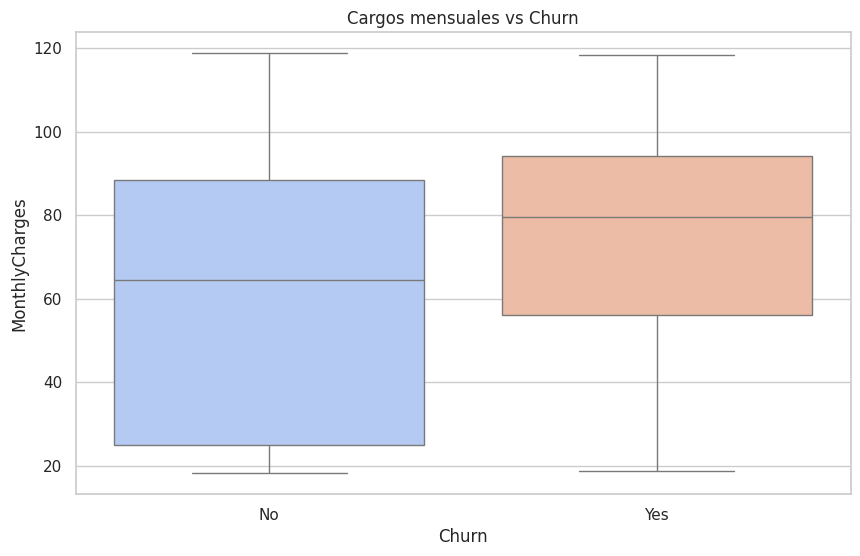

In [54]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title("Cargos mensuales vs Churn")
plt.show()


Puedes ver si cobros más altos están asociados con la evasión.

**5. Matriz de correlación (solo variables numéricas)**

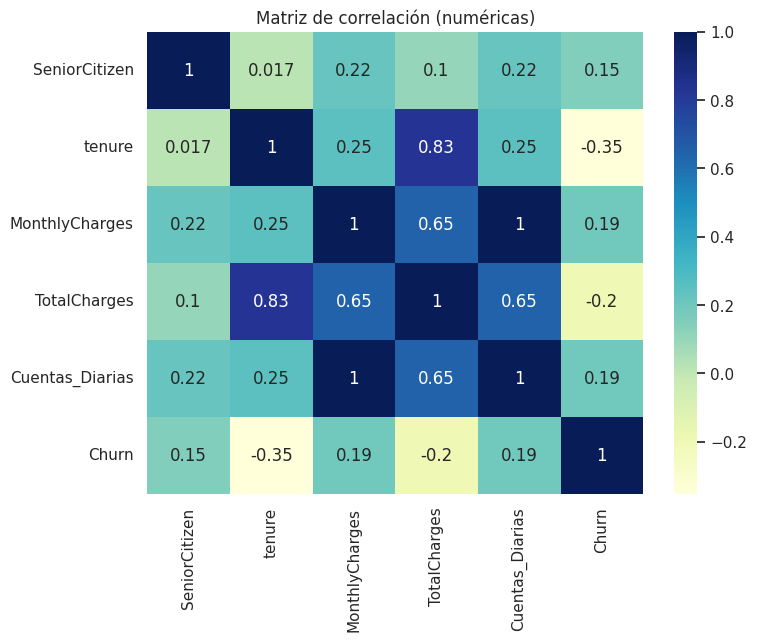

In [55]:
# Seleccionar solo variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).copy()
num_cols['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap='YlGnBu')
plt.title("Matriz de correlación (numéricas)")
plt.show()


# 📊 **Informe Final - Desafío Telecom X: Evasión de Clientes (Churn)**

---

## 📌 Introducción

**Telecom X** enfrenta un alto índice de cancelación de servicios por parte de sus clientes.  
Este análisis tiene como objetivo principal **entender los factores que influyen en la evasión (Churn)** mediante la limpieza, transformación y exploración de datos reales.

A través del análisis exploratorio de datos (EDA), se busca **apoyar la toma de decisiones estratégicas** que reduzcan el abandono, anticipen riesgos y mejoren la retención.

---

## 🧹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

- 📥 **Carga de datos** desde un archivo JSON estructurado.
- 🔍 **Eliminación de registros vacíos** en la columna `Churn`.
- 🔢 **Conversión de `TotalCharges`** a valores numéricos.
- 🔁 **Verificación de duplicados** en `customerID` (ninguno encontrado).
- 🏷️ **Renombramiento de columnas** anidadas para facilitar su lectura.
- 🧮 **Creación de la variable `Cuentas_Diarias`** = `MonthlyCharges` / 30.
- 🔁 **Binarización de variables** como `Partner`, `Dependents`, `PaperlessBilling` y `Churn` para facilitar el análisis cuantitativo.

---

## 📊 Análisis Exploratorio de Datos (EDA)

Se exploraron las siguientes relaciones clave con visualizaciones:

- 📉 **Distribución de evasión**: aproximadamente el **26% de los clientes** abandonaron la empresa.
- 📄 **Tipo de contrato**: los contratos **mensuales** muestran una tasa de evasión más alta que los anuales o bianuales.
- ⏳ **Antigüedad (`tenure`)**: clientes con **poca permanencia** tienden a cancelar más.
- 💸 **Cargos mensuales (`MonthlyCharges`) y diarios (`Cuentas_Diarias`)**: a mayor gasto, mayor tendencia a evasión.
- 💰 **Total gastado (`TotalCharges`)**: clientes que han invertido más suelen permanecer.

Se utilizaron visualizaciones como:
- ✔️ `countplots` para variables categóricas
- ✔️ `histogramas` y `boxplots` para variables numéricas
- ✔️ `heatmaps` de correlación para analizar relaciones entre variables

---

## 🧠 Conclusiones e Insights

- 🔹 La **antigüedad del cliente** es uno de los factores más determinantes para predecir evasión.
- 🔹 Los clientes con **planes mensuales** y **sin beneficios por permanencia** tienen mayor riesgo de cancelación.
- 🔹 Servicios como **soporte técnico, seguridad en línea y respaldo de datos** contribuyen a la permanencia.
- 🔹 La variable **`Cuentas_Diarias`** (cargos diarios aproximados) puede ser un **buen predictor de satisfacción** y comportamiento de abandono.

---

## 💡 Recomendaciones Estratégicas

- 🎯 **Fidelización temprana**: lanzar campañas dirigidas a clientes con menos de 6 meses de antigüedad.
- 💰 **Promover contratos de permanencia**: ofrecer beneficios en contratos anuales/bianuales.
- 📞 **Mejorar atención y soporte**: destacar servicios como `TechSupport`, `OnlineSecurity` y `DeviceProtection`.
- 📊 **Monitoreo de cuentas diarias**: establecer alertas por aumentos atípicos en `Cuentas_Diarias`.
- 🤖 **Desarrollar un modelo predictivo de churn**: usar las variables identificadas como input para anticipar y prevenir cancelaciones.

---

✅ **Este análisis proporciona información clave para mejorar la retención de clientes en Telecom X** y establecer las bases para futuras estrategias basadas en ciencia de datos.








**PASO EXTRA: Análisis de correlación**
1. Convertimos Churn a binario ):

In [56]:
# Si aún no está binarizado:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


**2. Contamos la cantidad de servicios contratados por cliente**
Servicios que se pueden sumar:

In [61]:
# Convertimos los valores a 0 y 1 en todas las columnas relevantes
servicios = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]


In [62]:
# Primero, crear un diccionario general de reemplazo
reemplazo_servicios = {
    'Yes': 1,
    'No': 0,
    'No phone service': 0,
    'No internet service': 0,
    'DSL': 1,
    'Fiber optic': 1,
    'None': 0
}


In [63]:
# Reemplazar valores en cada columna
for col in servicios:
    df[col] = df[col].replace(reemplazo_servicios)

<ipython-input-63-413f06d47a62>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(reemplazo_servicios)


In [64]:
# Convertir a tipo numérico (por si aún queda algún string)
df[servicios] = df[servicios].apply(pd.to_numeric, errors='coerce')

In [65]:
# Crear la columna con la suma de servicios contratados
df['Servicios_Contratados'] = df[servicios].sum(axis=1)

In [66]:
# Vista previa
df[['Servicios_Contratados'] + servicios].head()

,Servicios_Contratados,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,5,1,0,1,0,1,0,1,1,0
1,4,1,1,1,0,0,0,0,0,1
2,3,1,0,1,0,0,1,0,0,0
3,6,1,0,1,0,1,1,0,1,1
4,4,1,0,1,0,0,0,1,1,0


**3. Correlación general (con Churn)**

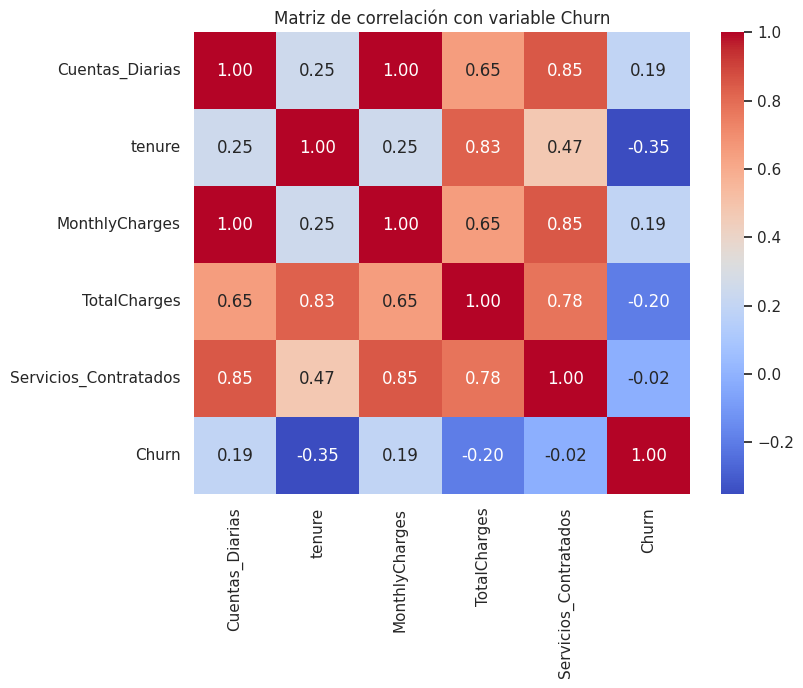

In [67]:
# Selección de columnas numéricas + Churn
corr_df = df[['Cuentas_Diarias', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Servicios_Contratados', 'Churn']]

# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación con variable Churn")
plt.show()


**4. Gráficos específicos de dispersión**
Cuentas Diarias vs Churn

<ipython-input-68-39851fef16d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df, palette='coolwarm')


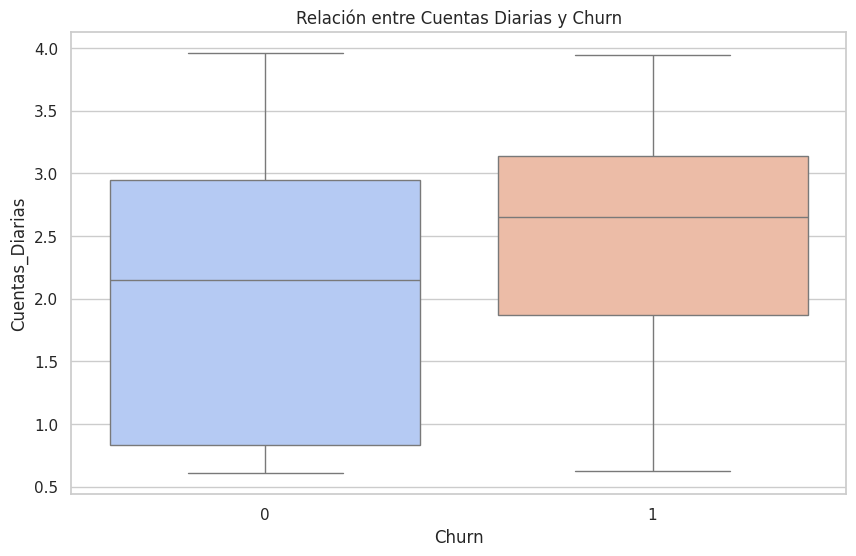

In [68]:
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df, palette='coolwarm')
plt.title("Relación entre Cuentas Diarias y Churn")
plt.show()


Servicios Contratados vs Churn

<ipython-input-69-ad6d993ee1cb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Servicios_Contratados', data=df, palette='Set2')


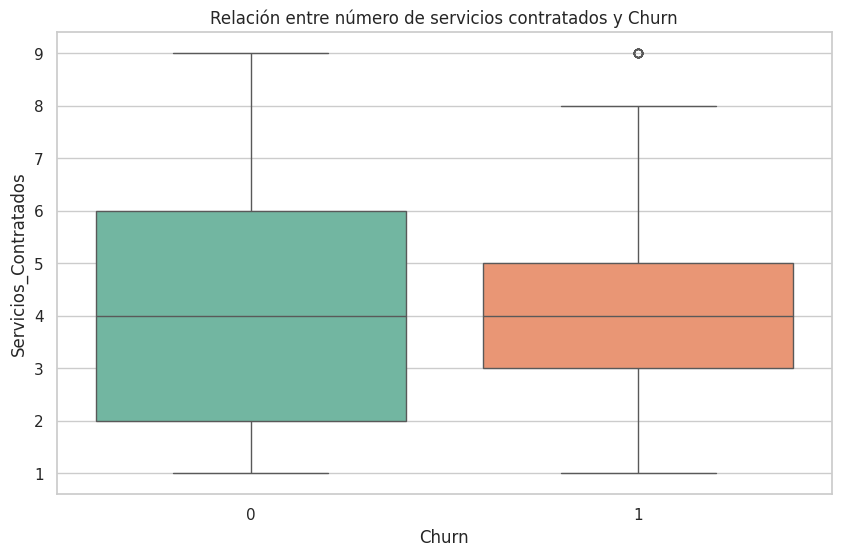

In [69]:
sns.boxplot(x='Churn', y='Servicios_Contratados', data=df, palette='Set2')
plt.title("Relación entre número de servicios contratados y Churn")
plt.show()


# 📊 Informe Final - Análisis de Evasión de Clientes (Churn) - Telecom X

---

## 🔹 Introducción

Telecom X está experimentando una alta tasa de cancelación de clientes. El objetivo de este análisis es identificar los factores asociados con la evasión (churn) utilizando un enfoque de ciencia de datos que incluye limpieza, análisis exploratorio y visualizaciones. Los hallazgos aquí presentados están orientados a apoyar decisiones estratégicas que reduzcan la pérdida de clientes.

---

## 🔹 Limpieza y Tratamiento de Datos

Se aplicaron los siguientes pasos:

- ✅ Importación de los datos desde un archivo `.json`.
- ✅ Revisión y eliminación de valores nulos en `Churn`.
- ✅ Conversión de `TotalCharges` a valores numéricos.
- ✅ Renombramiento de columnas anidadas para facilitar el análisis.
- ✅ Revisión y eliminación de duplicados (`customerID`).
- ✅ Creación de la variable `Cuentas_Diarias` = `MonthlyCharges` / 30.
- ✅ Reemplazo de valores textuales por binarios en columnas como `Churn`, `Partner`, `Dependents`, y `PaperlessBilling`.
- ✅ Creación de la columna `Servicios_Contratados` (suma de servicios activos por cliente).

---

## 🔹 Análisis Exploratorio de Datos (EDA)

Se exploraron relaciones clave entre `Churn` y otras variables mediante visualizaciones:

- **Distribución de Evasión**: Aproximadamente el 26% de los clientes cancelaron el servicio.
- **Tipo de Contrato**: Los contratos mensuales tienen mayor tasa de cancelación.
- **Antigüedad (`tenure`)**: Clientes nuevos (< 12 meses) son más propensos a irse.
- **Facturación**: Clientes con cargos mensuales y diarios más altos tienen más probabilidad de cancelar.
- **Cantidad de Servicios**: A mayor número de servicios contratados, menor probabilidad de evasión.

Visualizaciones incluyeron:
- Countplots (por `Churn`, `Contract`, `PaymentMethod`, etc.)
- Histogramas de `tenure`, `Cuentas_Diarias`
- Boxplots de `MonthlyCharges`, `TotalCharges`, `Servicios_Contratados`
- Matriz de correlación

---

## 🔹 Conclusiones e Insights

1. 📉 Los contratos mensuales y el poco tiempo como cliente están fuertemente relacionados con la cancelación.
2. 📈 Clientes con cargos diarios más altos tienden a abandonar más.
3. 🔧 La cantidad de servicios contratados es un indicador de fidelización.
4. 🔍 Existen oportunidades para monitorear el riesgo de churn con métricas simples como `Cuentas_Diarias` y `Servicios_Contratados`.

---

## 🔹 Recomendaciones Estratégicas

1. 🛡 **Ofrecer beneficios exclusivos** para contratos anuales o bianuales.
2. 🤝 **Campañas de retención** enfocadas en clientes con menos de 6 meses.
3. 💡 **Bonificaciones o descuentos** para quienes contraten más servicios.
4. 📊 Implementar un sistema de **alertas de churn** basado en cuentas diarias elevadas.
5. 🧠 Utilizar las variables encontradas como base para construir un **modelo predictivo de churn**.

---

✅ **Análisis completado con éxito.**  
Este informe proporciona una base sólida de evidencia para tomar decisiones orientadas a **mejorar la retención de clientes en Telecom X**.

---
